In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time as time
from scipy.sparse import spdiags


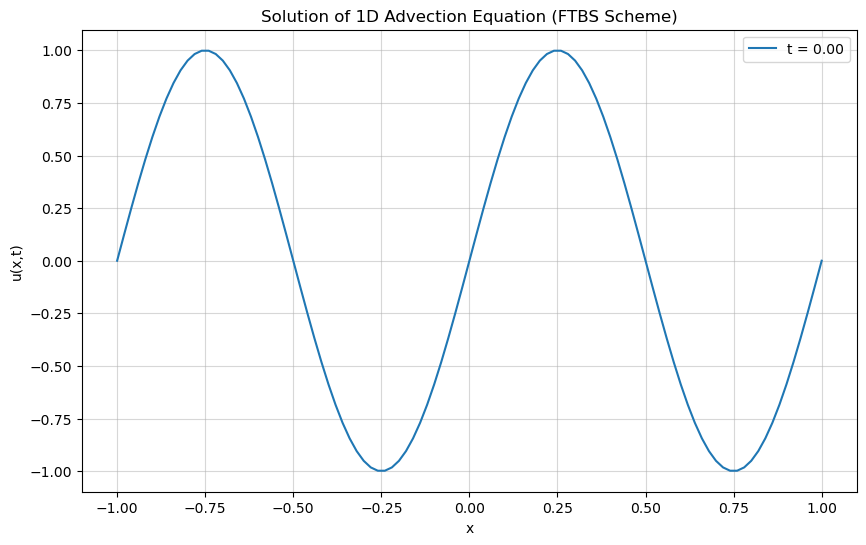

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def eta(y):
    return np.sin(2*np.pi*y)

# Constants
c = 0.5  # advection speed

# Domain
A, B = -1, 1

# Mesh
N = 99
h = (B-A)/(N+1)
xi = np.arange(A, B+h, h)

# Time step based on CFL condition
dt = 0.9 * h / c  # correct for advection
t_in, t_fin = 0, 1
t = np.arange(t_in, t_fin+dt, dt)
M = len(t)

# Initial condition
u = eta(xi)

# Store solution
u_sol = np.zeros((N+2, M))
u_sol[:,0] = u.copy()

# Error array
error = np.zeros((N+2, M))

mu = c * dt / h

# FTBS Scheme
for m in range(1, M):
    u_new = u.copy()
    u_new[1:] = u[1:] - mu*(u[1:] - u[:-1])
    u_new[0] = u_new[-1]  # periodic BC
    u = u_new.copy()
    u_sol[:, m] = u

# Plot
plt.figure(figsize=(10, 6))
ax = plt.gca()
for i in range(0, M, 50):
    ax.plot(xi, u_sol[:, i], label=f"t = {t[i]:.2f}")

plt.grid(alpha=0.5)
plt.legend()
plt.title('Solution of 1D Advection Equation (FTBS Scheme)')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.show()


In [8]:
u_exact = eta(xi - c*t[-1])
error_L2 = np.sqrt(np.sum((u_sol[:, -1] - u_exact)**2) * h)
print(f"L2 Error at final time: {error_L2:.4e}")


L2 Error at final time: 1.9700e-02


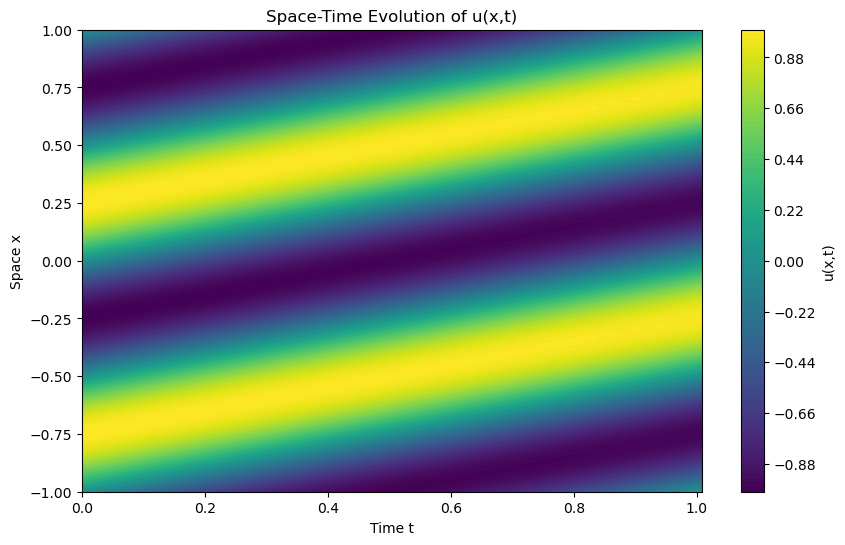

<Figure size 640x480 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt

# Plot space-time evolution
plt.figure(figsize=(10, 6))
plt.contourf(t, xi, u_sol, 100, cmap='viridis')
plt.colorbar(label='u(x,t)')
plt.xlabel('Time t')
plt.ylabel('Space x')
plt.title('Space-Time Evolution of u(x,t)')
plt.show()
plt.savefig("solution_evolution.png", dpi=300, bbox_inches='tight')



<>:67: SyntaxWarning: invalid escape sequence '\i'
<>:67: SyntaxWarning: invalid escape sequence '\i'
C:\Users\niroj\AppData\Local\Temp\ipykernel_22156\2921927819.py:67: SyntaxWarning: invalid escape sequence '\i'
  plt.ylabel('$||e||_{\infty}$ at final time')


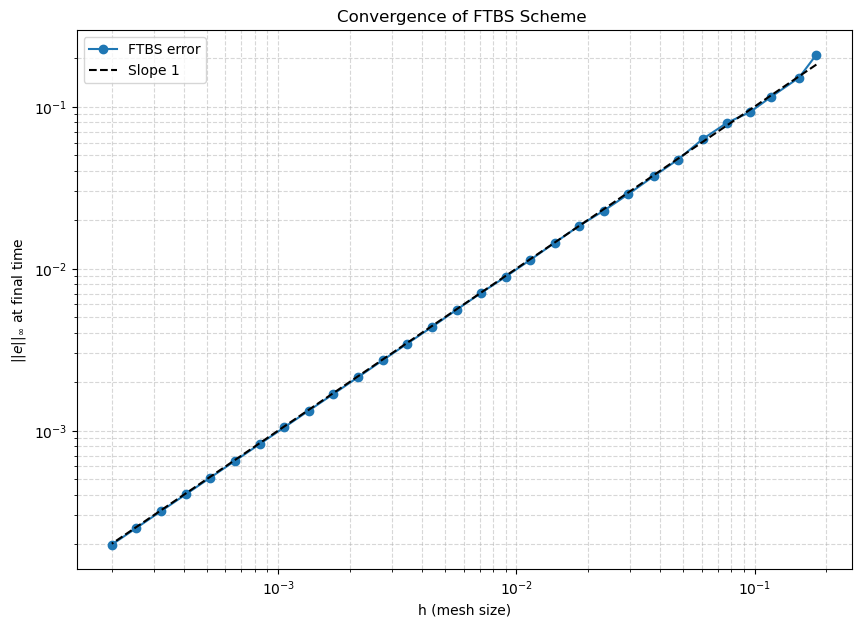

<Figure size 640x480 with 0 Axes>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Problem constants
c = 0.5  # advection speed
A, B = -1, 1

# Function
def eta(y):
    return np.sin(2*np.pi*y)

# N values (logarithmic spacing)
N_values = np.unique(np.logspace(np.log10(10), np.log10(10000), num=30, dtype=int))
# (30 points between 10 and 100000, unique to avoid duplicates)

error_list = []
h_list = []

for N in N_values:
    # Mesh
    h = (B - A) / (N + 1)
    xi = np.linspace(A, B, N+2)
    
    # Time step (stability condition for advection)
    dt = 0.9 * h / c
    t_in, t_fin = 0, 1
    t = np.arange(t_in, t_fin+dt, dt)
    M = len(t)
    
    # Initial condition
    u = eta(xi)
    
    # Storage
    u_sol = np.zeros((N+2, M))
    u_sol[:,0] = u.copy()
    
    mu = c * dt / h
    
    # FTBS time stepping
    for m in range(1, M):
        u_new = u.copy()
        u_new[1:] = u[1:] - mu*(u[1:] - u[:-1])
        u_new[0] = u_new[-1]  # periodic
        u = u_new.copy()
        u_sol[:, m] = u
    
    # Exact solution at final time
    u_exact = eta(xi - c*t[-1])
    
    # Compute L2 error
    #error = np.sqrt(np.sum((u_sol[:, -1] - u_exact)**2) *h)
    error = max(u_sol[:, -1] - u_exact)
    
    # Store h and error
    h_list.append(h)
    error_list.append(error)

# Convert to arrays
h_list = np.array(h_list)
error_list = np.array(error_list)

# Plot
plt.figure(figsize=(10,7))
plt.loglog(h_list, error_list, 'o-', label='FTBS error')
plt.loglog(h_list, h_list, 'k--', label='Slope 1')  # simple reference line
plt.xlabel('h (mesh size)')
plt.ylabel('$||e||_{\infty}$ at final time')
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.legend()
plt.title('Convergence of FTBS Scheme ')
plt.show()
plt.savefig("ftbs_convergence.png", dpi=300, bbox_inches='tight')
